In [1]:
import os
import logging
import numpy as np
from matplotlib import pyplot as plt
from photometry import *
from paths import *

logger = logging.getLogger('EBV100')
setup_logging()

region = 'N'
path_data = path_data(region)
path_randoms = path_randoms(region)
path_mctool = path_mctool(region)
path_obiwan = os.path.join(path_dir,'Obiwan','dr9','ebv100','randoms','randoms_full_matched_input.fits')

In [2]:
# Obiwan
obiwan = TargetSelection.load_objects(path_obiwan,radecbox=None,tracer='ELG',region=None)
obiwan.set_upper_case()
obiwan['MATCHED'] = obiwan['BRICKNAME'] != ''
obiwan['RA'] = obiwan['SIM_RA']
obiwan['DEC'] = obiwan['SIM_DEC']
logger.info('Found {:d}/{:d} matches.'.format(obiwan['MATCHED'].sum(),obiwan.size))

obiwan.set_estimated_flux(key='SIM_EFLUX',key_transmission='SIM_MW_TRANSMISSION',key_flux='SIM_FLUX')
obiwan.set_estimated_flux(key='EFLUX',key_transmission='MW_TRANSMISSION',key_flux='FLUX')
mask_tsin = obiwan.mask_maskbit(key_nobs='SIM_NOBS',key_maskbits='SIM_MASKBITS') & obiwan.mask_ts(key_flux='SIM_EFLUX',region=region)
mask_tsout = obiwan.mask_maskbit(key_nobs='NOBS',key_maskbits='MASKBITS') & obiwan.mask_ts(key_flux='EFLUX') & obiwan['MATCHED']
logger.info('Selecting {:d} (output)/{:d} (input) injected sources.'.format(mask_tsin.sum(),mask_tsout.sum()))
obiwan_data = obiwan[mask_tsout]
obiwan_randoms = obiwan[mask_tsin]

obiwan.set_estimated_flux(key='SIM_EFLUX',key_transmission='SIM_MW_TRANSMISSION',key_flux='SIM_FLUX')
obiwan.set_estimated_flux(key='EFIBERFLUX',key_transmission='MW_TRANSMISSION',key_flux='FIBERFLUX')
mask_tsin = obiwan.mask_maskbit(key_nobs='SIM_NOBS',key_maskbits='SIM_MASKBITS') & obiwan.mask_ts(key_flux='SIM_EFLUX',region=region)
mask_tsout = obiwan.mask_maskbit(key_nobs='NOBS',key_maskbits='MASKBITS') & obiwan.mask_ts(key_flux='EFIBERFLUX') & obiwan['MATCHED']
logger.info('Selecting {:d} (output)/{:d} (input) injected sources.'.format(mask_tsin.sum(),mask_tsout.sum()))
obiwanfiber_data = obiwan[mask_tsout]
obiwanfiber_randoms = obiwan[mask_tsin]

[ 000000.01 ]: 12-13 05:26  Catalogue       INFO     Loading catalogue /global/cscratch1/sd/adematti/Obiwan/dr9/ebv100/randoms/randoms_full_matched_input.fits.
[ 000000.13 ]: 12-13 05:26  TargetSelection INFO     Selecting 30467/30467 targets.
[ 000000.25 ]: 12-13 05:26  EBV100          INFO     Found 27661/30467 matches.
/global/homes/a/adematti/lib/photometry/target_selection.py:92: RuntimeWarning: invalid value encountered in true_divide
  return self['{}_{}'.format(key_flux,b)]/self['{}_{}'.format(key_transmission,b)]
[ 000000.61 ]: 12-13 05:26  EBV100          INFO     Selecting 2551 (output)/2711 (input) injected sources.
/global/homes/a/adematti/lib/photometry/target_selection.py:92: RuntimeWarning: invalid value encountered in true_divide
  return self['{}_{}'.format(key_flux,b)]/self['{}_{}'.format(key_transmission,b)]
[ 000000.67 ]: 12-13 05:26  EBV100          INFO     Selecting 2551 (output)/1341 (input) injected sources.


[ 000000.72 ]: 12-13 05:26  Catalogue       INFO     Loading catalogue /global/cfs/cdirs/desi/target/catalogs/dr9m/0.42.0/pixweight/main/resolve/dark/pixweight-dark.fits.
[ 000000.78 ]: 12-13 05:26  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000000.78 ]: 12-13 05:26  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000000.79 ]: 12-13 05:26  HealpixDensity  INFO     Found 385 bricks with randoms.


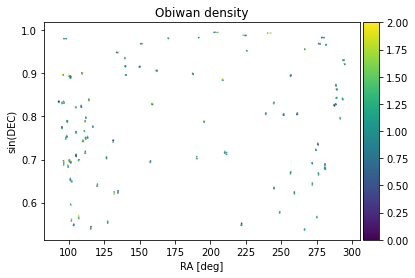

[ 000001.03 ]: 12-13 05:26  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000001.04 ]: 12-13 05:26  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000001.04 ]: 12-13 05:26  HealpixDensity  INFO     Found 385 bricks with randoms.
[ 000001.13 ]: 12-13 05:26  Properties      INFO     Calculating EBV statistics.
[ 000001.18 ]: 12-13 05:26  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.2121.
[ 000001.18 ]: 12-13 05:26  Properties      INFO     Calculating EBV statistics.
[ 000001.21 ]: 12-13 05:26  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.2121.
[ 000001.22 ]: 12-13 05:26  Properties      INFO     Calculating GALDEPTH_G statistics.
[ 000001.26 ]: 12-13 05:26  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.2023.
[ 000001.26 ]: 12-13 05:26  Properties      INFO     Calculating GALDEPTH_G statistics.
[ 000001.30 ]: 12-13 05:26  HealpixDensity  INFO     Fraction of rand

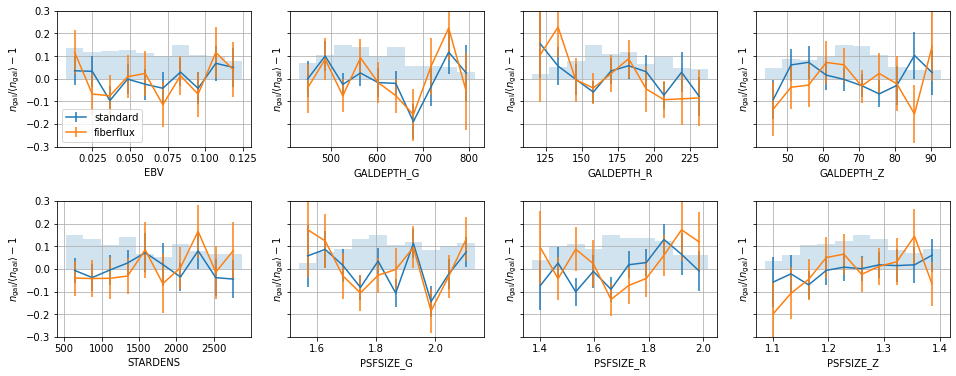

In [3]:
# Density maps
map = Catalogue.load(path_hp)
obiwan_dens = HealpixDensity(map=map)
obiwan_dens.set_randoms(randoms=obiwan_randoms)
obiwan_dens.set_properties()
obiwan_dens.set_data(data=obiwan_data)
obiwan_dens.plot_density_map(title='Obiwan density',vmin=0,vmax=2)

obiwanfiber_dens = HealpixDensity(map=map)
obiwanfiber_dens.set_randoms(randoms=obiwanfiber_randoms)
obiwanfiber_dens.set_properties()
obiwanfiber_dens.set_data(data=obiwanfiber_data)

props = ['EBV'] + ['GALDEPTH_{}'.format(b) for b in obiwan_data.bands] + ['STARDENS'] +  ['PSFSIZE_{}'.format(b) for b in obiwan_data.bands]

others = [obiwanfiber_dens]
labels = ['standard','fiberflux']

fig,lax = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(16,6))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
lax = lax.flatten()
for iax,prop in enumerate(props):
    obiwan_dens.plot_density_variations(ax=lax[iax],others=others,prop=prop,histos=[obiwan_dens],var_kwargs={'labels':labels if iax==0 else None},leg_kwargs={},xedges={'quantiles':[0.1,0.9]})
plt.show()

## No striking difference between standard cuts and fiberflux cuts. Let's look at fluxes.

[ 000003.11 ]: 12-13 05:26  EBV100          INFO     Scatter standard 0.0558 50.4008
[ 000003.11 ]: 12-13 05:26  EBV100          INFO     Scatter fiber 0.0673 38.7866


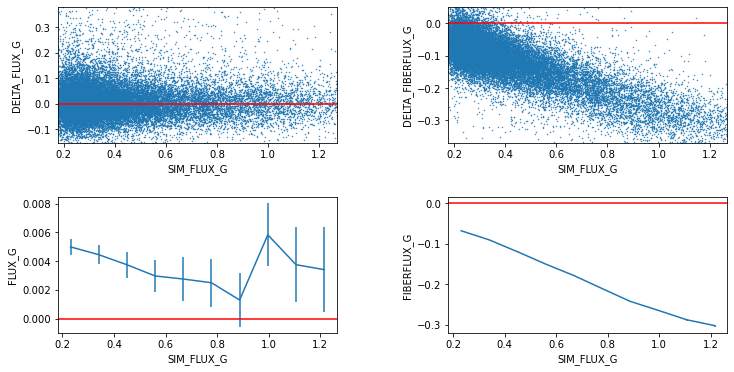

In [4]:
obiwan = obiwan[obiwan['MATCHED']]
from scipy import special,stats
def estimate_std(tab):
        return np.median(np.abs(tab-np.median(tab)))/(2.**0.5*special.erfinv(1./2.))

from photometry.utils import Binning

b = 'G'
for xlabel in ['SIM_FLUX_{}'.format(b)]:
    fig,lax = plt.subplots(ncols=2,nrows=2,sharex=False,sharey=False,figsize=(12,6))
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    lax = lax.flatten()
    keys_flux = ['FLUX_{}'.format(b),'FIBERFLUX_{}'.format(b)]
    for ax,key in zip(lax,keys_flux):
        obiwan['DELTA_{}'.format(key)] = (obiwan[key]-obiwan['SIM_FLUX_{}'.format(b)])/obiwan['MW_TRANSMISSION_{}'.format(b)]
        obiwan.plot_scatter(ax,prop1=xlabel,prop2='DELTA_{}'.format(key),xedges={'quantiles':[0.01,0.99]},yedges={'quantiles':[0.01,0.99]})
        ax.axhline(y=0,xmin=0,xmax=1,color='r')
    lax = lax[len(keys_flux):]
    for ax,key in zip(lax,keys_flux):
        xedges = Binning(samples=obiwan[xlabel],quantiles=[0.01,0.99]).edges
        x = (xedges[:-1] + xedges[1:])/2.
        y = stats.binned_statistic(obiwan[xlabel],obiwan['DELTA_{}'.format(key)],bins=xedges,statistic='median')[0]
        yerr = stats.binned_statistic(obiwan[xlabel],obiwan['DELTA_{}'.format(key)],bins=xedges,statistic=estimate_std)[0]
        counts = stats.binned_statistic(obiwan[xlabel],obiwan['DELTA_{}'.format(key)],bins=xedges,statistic='count')[0]
        yerr *= 1/counts**0.5 # trick to estimate standard deviation in presence of outliers
        ax.errorbar(x,y,yerr)
        ax.axhline(y=0,xmin=0,xmax=1,color='r')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(key)

logger.info('Scatter standard {:.4f} {:.4f}'.format(estimate_std(obiwan['DELTA_FLUX_G']),np.std(obiwan['DELTA_FLUX_G'])))
logger.info('Scatter fiber {:.4f} {:.4f}'.format(estimate_std(obiwan['DELTA_FIBERFLUX_G']),np.std(obiwan['DELTA_FIBERFLUX_G'])))

## Let's correct for FIBERFLUX_G = f(FLUX_G)

[ 000003.65 ]: 12-13 05:26  EBV100          INFO     Scatter standard 0.0558 50.4008
[ 000003.65 ]: 12-13 05:26  EBV100          INFO     Scatter fiber 0.0530 49.6466


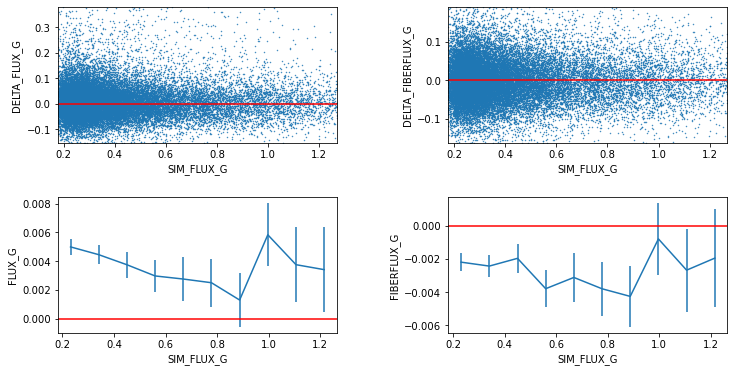

In [5]:
for xlabel in ['SIM_FLUX_{}'.format(b)]:
    fig,lax = plt.subplots(ncols=2,nrows=2,sharex=False,sharey=False,figsize=(12,6))
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    lax = lax.flatten()
    keys_flux = ['FLUX_{}'.format(b),'FIBERFLUX_{}'.format(b)]
    for ax,key in zip(lax,keys_flux):
        obiwan['DELTA_{}'.format(key)] = (obiwan[key]-obiwan['SIM_FLUX_{}'.format(b)])/obiwan['MW_TRANSMISSION_{}'.format(b)]
        if 'FIBER' in key: obiwan['DELTA_{}'.format(key)] = (1.28*obiwan[key]-obiwan['SIM_FLUX_{}'.format(b)])/obiwan['MW_TRANSMISSION_{}'.format(b)]
        obiwan.plot_scatter(ax,prop1=xlabel,prop2='DELTA_{}'.format(key),xedges={'quantiles':[0.01,0.99]},yedges={'quantiles':[0.01,0.99]})
        ax.axhline(y=0,xmin=0,xmax=1,color='r')
    lax = lax[len(keys_flux):]
    for ax,key in zip(lax,keys_flux):
        xedges = Binning(samples=obiwan[xlabel],quantiles=[0.01,0.99]).edges
        x = (xedges[:-1] + xedges[1:])/2.
        y = stats.binned_statistic(obiwan[xlabel],obiwan['DELTA_{}'.format(key)],bins=xedges,statistic='median')[0]
        yerr = stats.binned_statistic(obiwan[xlabel],obiwan['DELTA_{}'.format(key)],bins=xedges,statistic=estimate_std)[0]
        counts = stats.binned_statistic(obiwan[xlabel],obiwan['DELTA_{}'.format(key)],bins=xedges,statistic='count')[0]
        yerr *= 1/counts**0.5 # trick to estimate standard deviation in presence of outliers
        ax.errorbar(x,y,yerr)
        ax.axhline(y=0,xmin=0,xmax=1,color='r')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(key)

logger.info('Scatter standard {:.4f} {:.4f}'.format(estimate_std(obiwan['DELTA_FLUX_G']),np.std(obiwan['DELTA_FLUX_G'])))
logger.info('Scatter fiber {:.4f} {:.4f}'.format(estimate_std(obiwan['DELTA_FIBERFLUX_G']),np.std(obiwan['DELTA_FIBERFLUX_G'])))